In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
df = pd.read_csv('./covid-19_symptoms_dataset.csv')

Covid-19 positive and negative cases patient's symptoms dataset collected from a nearby hospital. There is a total of 2575 Covid-19 positive and negative patients symptoms of including age, fever, body pain, runny nose, diff breath, and the infection probability of Covid-19 patients which is either 1 or 0. Where 1 indicates Covid positive cases and 0 indicates Covid negative cases. In an age which contains 1 to 100 yrs old patients with different values of fever. But in diff breath there are three types of values, where-1 denotes no diff breath problem, 1 denotes a severe diff breath problem, and 0 denotes a moderate diff breath problem. And lastly, in runny nose and body pain, there are two types of values in this dataset. This dataset collection methodology was basically self gathered.

Fever - The total of 2575 covid-19 positive and negative patient fever values from 98 F to 104 F.

BodyPain - 2575 covid-19 positive and negative patient body pain symptoms. Here, 0 means he or she had no body pain and 1 means

Age - 2575 covid-19 positive and negative patients' different age graphs ranging from 1 to 100 years

RunnyNose - The total of 2575 covid-19 positive and negative patient runny nose problem values. Here 0 indicates no runny nose

DiffBreath - The total of 2575 covid-19 positive and negative patient diff breath problem. Here -1 denotes no diff breath problem, 1

InfectionProb - This is the Covid-19 positive and negative cases patients value. Here denotes negative cases and 1 denotes positive

In [3]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,100.969709,0.492816,51.023301,0.502136,0.002330,0.493592
std,1.999771,0.500045,29.014442,0.500093,0.816969,0.500056
min,98.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.000000,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,101.000000,0.000000,50.000000,1.000000,0.000000,0.000000
75%,103.000000,1.000000,76.500000,1.000000,1.000000,1.000000
max,104.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2570,False,False,False,False,False,False
2571,False,False,False,False,False,False
2572,False,False,False,False,False,False
2573,False,False,False,False,False,False


In [5]:
df.isnull().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64

In [6]:
df['fever'] = (df['fever']-32)*5/9

### °F -> °C

In [7]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,38.316505,0.492816,51.023301,0.502136,0.002330,0.493592
std,1.110984,0.500045,29.014442,0.500093,0.816969,0.500056
min,36.666667,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,37.222222,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,38.333333,0.000000,50.000000,1.000000,0.000000,0.000000
75%,39.444444,1.000000,76.500000,1.000000,1.000000,1.000000
max,40.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [8]:
df['fever'].plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x000001C1E7307FA0>>

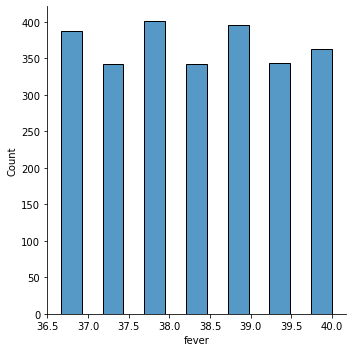

In [9]:
sns.displot(df, x='fever')

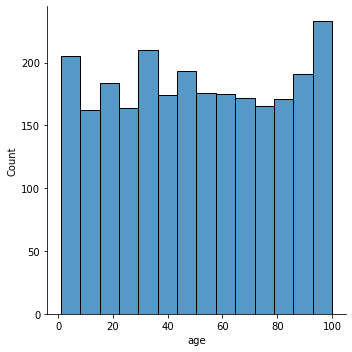

In [10]:
sns.displot(df, x='age')

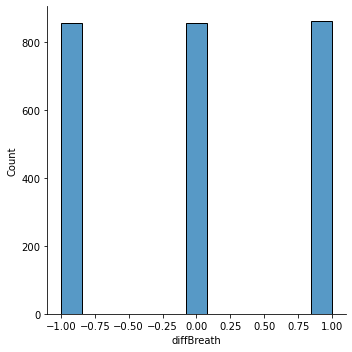

In [11]:
sns.displot(df, x='diffBreath')

In [12]:
df.corr()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
fever,1.000000,-0.013039,-0.021883,0.011719,0.000281,-0.007187
bodyPain,-0.013039,1.000000,-0.012199,-0.036059,0.005747,-0.031646
age,-0.021883,-0.012199,1.000000,0.029824,0.006668,-0.035496
runnyNose,0.011719,-0.036059,0.029824,1.000000,0.047533,-0.017423
diffBreath,0.000281,0.005747,0.006668,0.047533,1.000000,-0.027542
infectionProb,-0.007187,-0.031646,-0.035496,-0.017423,-0.027542,1.000000


**Pearson coeficient is almost 0 for different variables, which is great! - NO linear correlation**

## VIF

In [14]:
#find design matrix for linear regression model using 'infectionProb' as response variable 
y, X = dmatrices('infectionProb ~ fever+bodyPain+age+runnyNose+diffBreath', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif


,VIF,variable
0,1199.751425,Intercept
1,1.000798,fever
2,1.001649,bodyPain
3,1.001545,age
4,1.004586,runnyNose
5,1.002349,diffBreath


**Multicollinearity does not exist**

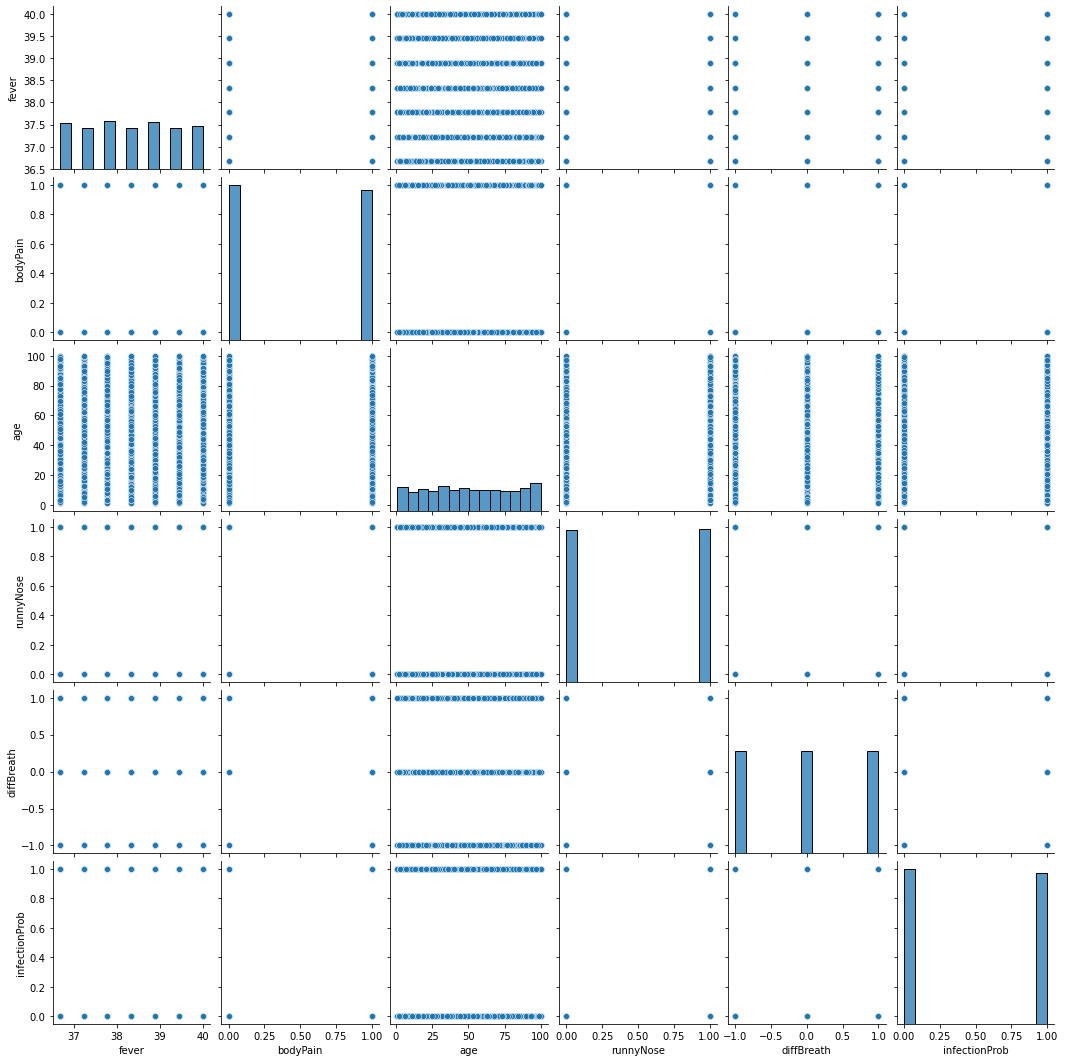

In [15]:
sns.pairplot(df)